#Arnav Singh
#Applied Data Science 
#Assignment 3

1. Download the dataset: https://drive.google.com/file/d/1NtOKehSz8SiVnk0cPZX5TFndug4SYL5T/view

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

2. Load the dataset into the tool.

In [55]:
data_frame = pd.read_csv('Housing.csv')
data_frame.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


3. Perform Below Visualizations.

● Univariate Analysis

● Bi - Variate Analysis

● Multi - Variate Analysis

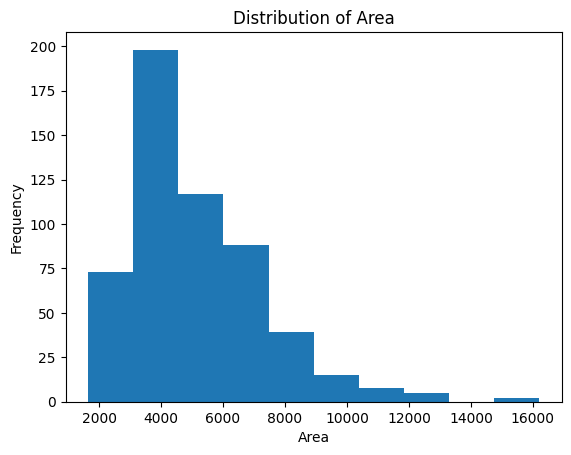

In [56]:
# Univariate Analysis
# Distribution of age
plt.hist(data_frame['area'])
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area')
plt.show()

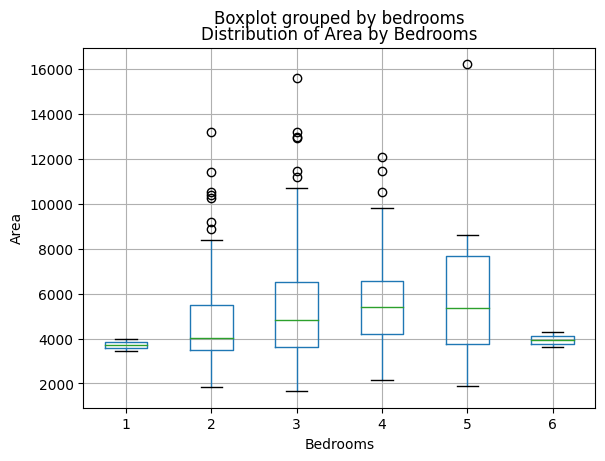

In [57]:
#Bivariate Analysis:
data_frame.boxplot(column='area', by='bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Area')
plt.title('Distribution of Area by Bedrooms')
plt.show()

<ipython-input-58-7bd7e32c7603>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_frame.corr()


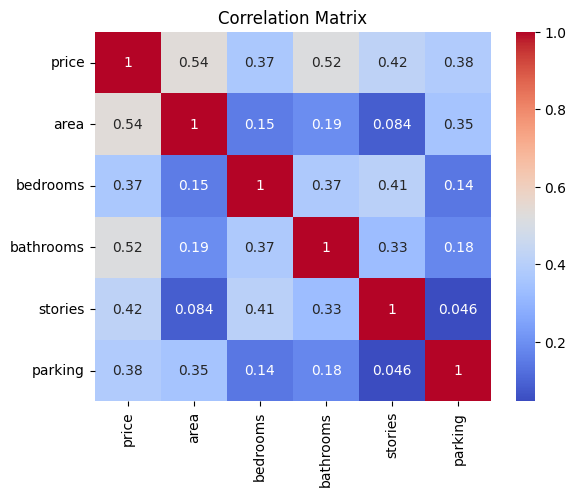

In [58]:
#Multivariate Analysis:
corr_matrix = data_frame.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Perform descriptive statistics on the dataset.

In [59]:
#Numerical variables
data_frame.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [60]:
#Categorical variables
data_frame.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
count,545,545,545,545,545,545
unique,2,2,2,2,2,3
top,yes,no,no,no,no,semi-furnished
freq,468,448,354,520,373,227


5. Handle the Missing values.

In [61]:
data_frame.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

No missing value.

6. Find the outliers and replace the outliers

In [62]:
# Define a function to identify and replace outliers using Z-score
def replace_outliers_zscore(data, column, threshold):
    z_scores = (data_frame[column] - data_frame[column].mean()) / data_frame[column].std()
    data_frame[column] = np.where(abs(z_scores) > threshold, data_frame[column].median(), data_frame[column])

# Specify the columns to check for outliers and the threshold value
columns_to_check = ['area', 'price']
z_score_threshold = 3

# Replace outliers using Z-score method
for column in columns_to_check:
    replace_outliers_zscore(data_frame, column, z_score_threshold)

# Print the updated dataset with replaced outliers
print(data_frame)


         price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0    4340000.0  7420.0         4          2        3      yes        no   
1    4340000.0  8960.0         4          4        4      yes        no   
2    4340000.0  9960.0         3          2        2      yes        no   
3    4340000.0  7500.0         4          2        2      yes        no   
4    4340000.0  7420.0         4          1        2      yes       yes   
..         ...     ...       ...        ...      ...      ...       ...   
540  1820000.0  3000.0         2          1        1      yes        no   
541  1767150.0  2400.0         3          1        1       no        no   
542  1750000.0  3620.0         2          1        1      yes        no   
543  1750000.0  2910.0         3          1        1       no        no   
544  1750000.0  3850.0         3          1        2      yes        no   

    basement hotwaterheating airconditioning  parking furnishingstatus  
0         no              

7. Check for Categorical columns and perform encoding.

In [69]:
data_frame['mainroad'] = data_frame['mainroad'].astype('category')
data_frame['mainroad'] = data_frame['mainroad'].cat.codes

data_frame['guestroom'] = data_frame['guestroom'].astype('category')
data_frame['guestroom'] = data_frame['guestroom'].cat.codes

data_frame['basement'] = data_frame['basement'].astype('category')
data_frame['basement'] = data_frame['basement'].cat.codes

data_frame['hotwaterheating'] = data_frame['hotwaterheating'].astype('category')
data_frame['hotwaterheating'] = data_frame['hotwaterheating'].cat.codes

data_frame['airconditioning'] = data_frame['airconditioning'].astype('category')
data_frame['airconditioning'] = data_frame['airconditioning'].cat.codes


code_mapping_furniture = {'unfurnished':0, 'semi-furnished':1, 'furnished':2}
data_frame['furnishingstatus'] = data_frame['furnishingstatus'].astype('category')
data_frame['furnishingstatus'] = data_frame['furnishingstatus'].map(code_mapping_furniture)
data_frame

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000.0,7420.0,4,2,3,1,0,0,0,1,2,NaN
1,4340000.0,8960.0,4,4,4,1,0,0,0,1,3,NaN
2,4340000.0,9960.0,3,2,2,1,0,1,0,0,2,NaN
3,4340000.0,7500.0,4,2,2,1,0,1,0,1,3,NaN
4,4340000.0,7420.0,4,1,2,1,1,1,0,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2,1,1,1,0,1,0,0,2,NaN
541,1767150.0,2400.0,3,1,1,0,0,0,0,0,0,NaN
542,1750000.0,3620.0,2,1,1,1,0,0,0,0,0,NaN
543,1750000.0,2910.0,3,1,1,0,0,0,0,0,0,NaN


8. Split the data into dependent and independent variables.

In [70]:
x = data_frame.drop(columns = 'price')
y = data_frame['price']
y_max = max(data_frame['price'])
print(y_max)

10150000.0


9. Scale the independent variables

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_scaled

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.237672,1.403419,1.421812,1.378217,1.517692,0,1,1,0,1,0,1,0,0,1,1,0,0
1,2.036247,1.403419,5.405809,2.532024,2.679409,0,1,1,0,1,0,1,0,0,1,1,0,0
2,2.554802,0.047278,1.421812,0.224410,1.517692,0,1,1,0,0,1,1,0,1,0,0,1,0
3,1.279156,1.403419,1.421812,0.224410,2.679409,0,1,1,0,0,1,1,0,0,1,1,0,0
4,1.237672,1.403419,-0.570187,0.224410,1.517692,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.054343,-1.308863,-0.570187,-0.929397,1.517692,0,1,1,0,0,1,1,0,1,0,0,0,1
541,-1.365476,0.047278,-0.570187,-0.929397,-0.805741,1,0,1,0,1,0,1,0,1,0,0,1,0
542,-0.732839,-1.308863,-0.570187,-0.929397,-0.805741,0,1,1,0,1,0,1,0,1,0,0,0,1
543,-1.101013,0.047278,-0.570187,-0.929397,-0.805741,1,0,1,0,1,0,1,0,1,0,1,0,0


10. Split the data into training and testing

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.3, random_state = 0)
print("Done")

Done


11. Build the Model and 12. Train the Model

In [80]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Done")

Done


In [81]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Done")

Done


In [49]:
y_pred_train = model.predict(x_train)
print("Done")

Done


RESULT WITH TRAINED DATA
Number of data train:  381


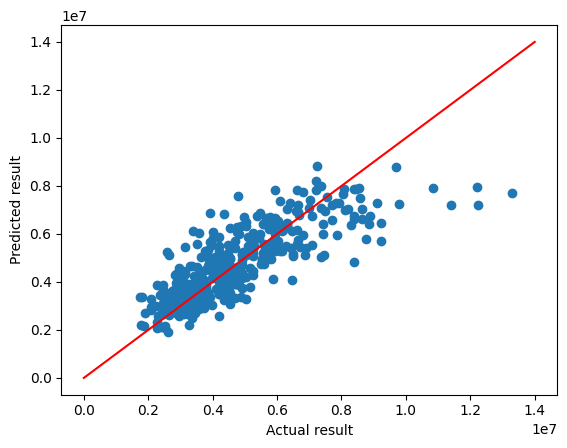

In [50]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual result")
plt.ylabel("Predicted result")
x_point = np.array([0,14000000])
y_point = np.array([0,14000000])
# max value of y is around 13 million
plt.plot(x_point, y_point, c = 'r')
print("RESULT WITH TRAINED DATA")
print("Number of data train: ", len(x_train))
plt.show()

13. Test the Model

In [53]:
y_pred_test = model.predict(x_test)
print("Done")

Done


RESULT WITH TESTED DATA
Number of data test:  164


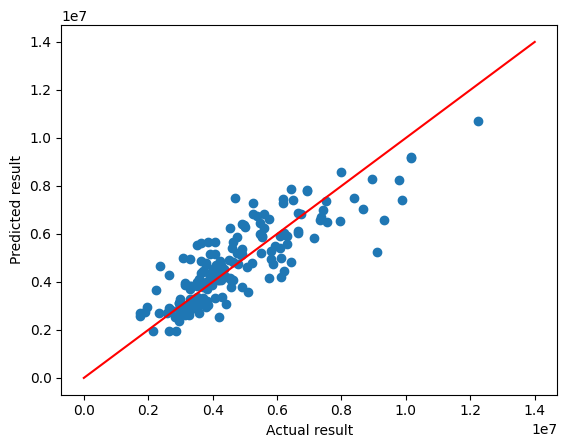

In [54]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual result")
plt.ylabel("Predicted result")
x_point = np.array([0,14000000])
y_point = np.array([0,14000000])
plt.plot(x_point, y_point, c = 'r')
print("RESULT WITH TESTED DATA")
print("Number of data test: ", len(x_test))
plt.show()

14. Measure the performance using Metrics.

In [82]:
from sklearn.metrics import r2_score
r2_score_with_test = r2_score(y_test, y_pred_test)
print(r2_score_with_test)

0.5988502150753243
